In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

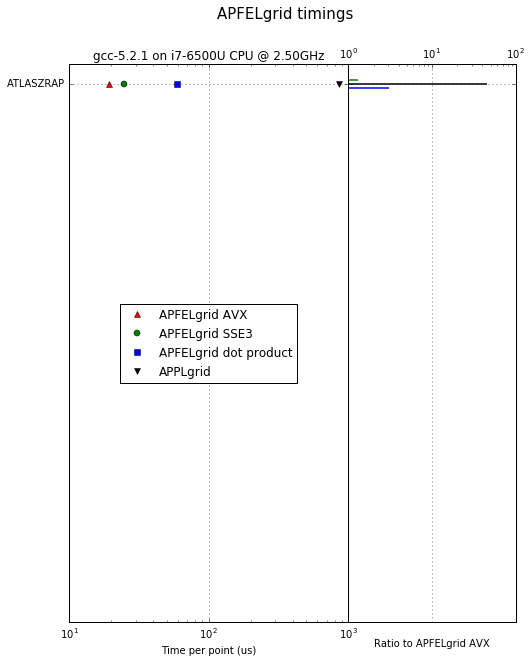

In [53]:
# avx
A = np.array([19.249])
# sse3
B = np.array([24.8454])
# std
C = np.array([59.4171])
# applgrid
D = np.array([863.274])

X = np.array(range(len(A)))

# plots
f = plt.figure(figsize=(8,10))
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 3]) 
plt.gca().invert_yaxis()

ax0 = plt.subplot(gs[0])

plt.plot(A,X,'^',color='r', label='APFELgrid AVX')
plt.plot(B,X,'o',color='g', label='APFELgrid SSE3')
plt.plot(C,X,'s',color='b', label='APFELgrid dot product')
plt.plot(D,X,'v',color='k', label='APPLgrid')

plt.yticks(X,
           ('ATLASZRAP',))
plt.xlabel('Time per point (us)')
plt.legend(loc='center', numpoints=1)
plt.ylim([28,-1])
plt.xscale('log')
plt.grid()

ax1 = plt.subplot(gs[1], sharey=ax0)
plt.xlabel('\nRatio to APFELgrid AVX')
ax1.xaxis.tick_top()

plt.hlines(X-0.2,1,B/A,'g', lw=1.5)
plt.hlines(X,1,D/A,'k', lw=1.5)
plt.hlines(X+0.2,1,C/A,'b', lw=1.5)

plt.ylim([28,-1])
plt.xlim([1.0,100.0])
plt.grid()
plt.xscale('log')

plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp([ax0], title='gcc-5.2.1 on i7-6500U CPU @ 2.50GHz')

f.suptitle('APFELgrid timings', fontsize=15)
gs.update(wspace=0.0)

plt.savefig('../plots/t0.pdf',bbox_inches='tight')